In [3]:
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt   
import seaborn as sns

In [6]:
df = pd.read_csv('table13.csv')

In [7]:
df.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1826 non-null   object 
 1   Agency type         1826 non-null   object 
 2   Agency name         1826 non-null   object 
 3   Race                1826 non-null   int64  
 4   Religion            1826 non-null   int64  
 5   Sexual orientation  1826 non-null   int64  
 6   Ethnicity           1826 non-null   int64  
 7   Disability          1826 non-null   int64  
 8   Gender              1824 non-null   object 
 9   Gender Identity     1824 non-null   float64
 10  1st quarter         1797 non-null   float64
 11  2nd quarter         1790 non-null   float64
 12  3rd quarter         1798 non-null   float64
 13  4th quarter         1782 non-null   float64
 14  Population          1434 non-null   object 
dtypes: float64(5), int64(5), object(5)
memory usage: 214.1+

In [9]:
df.describe()

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1824.000000,1797.000000,1790.000000,1798.000000,1782.000000
mean,1.572837,0.565170,0.677437,0.358708,0.045455,0.016996,0.703951,0.924581,0.932147,0.749719
std,4.081956,4.022999,3.195289,1.379308,0.365069,0.307587,2.250526,3.206061,3.262212,2.988503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,88.000000,152.000000,99.000000,36.000000,12.000000,12.000000,56.000000,84.000000,81.000000,93.000000


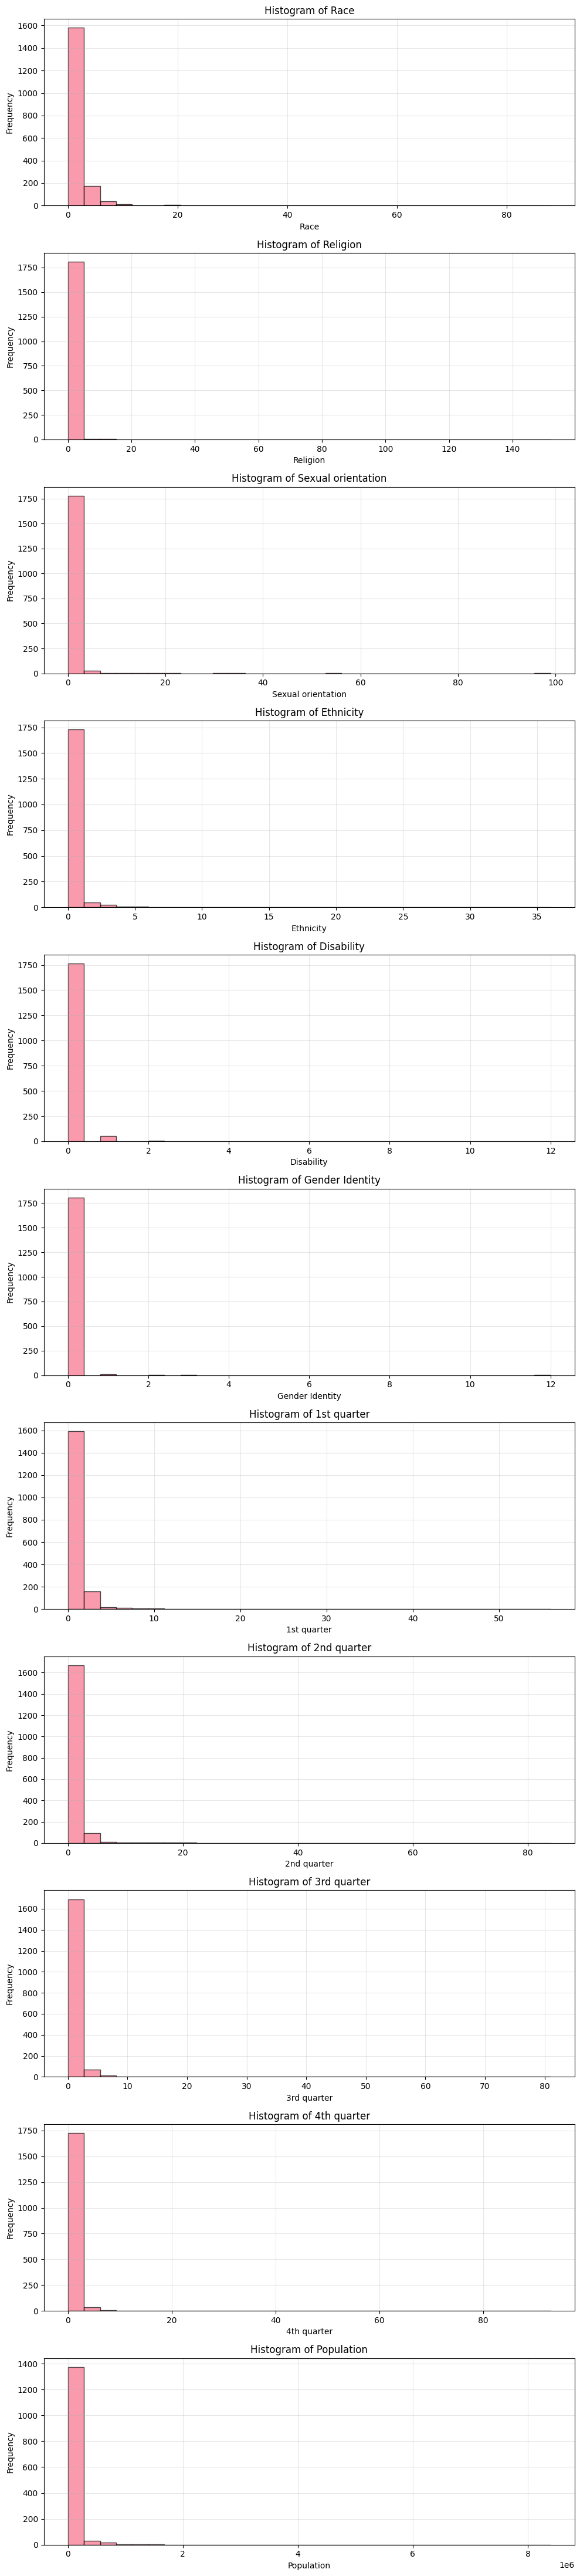

In [17]:
# set default matplotlib style and a nice seaborn color palette
plt.style.use('default')
sns.set_palette("husl")

# grab only numeric columns (ignore categorical stuff)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# handle Population column if it exists — make sure it's numeric
if 'Population' in df.columns:
    # convert to string first just in case, then remove commas and cast to float
    df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)
    
    # add it to numeric columns if it isn't already there
    if 'Population' not in numeric_columns:
        numeric_columns.append('Population')

# make one histogram per numeric column
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 4 * len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = [axes]  # keep things consistent when there’s only one plot

# loop through each numeric column and draw histograms
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# adjust layout and show everything
plt.tight_layout()
plt.show()


C:\Users\kimiw\AppData\Local\Temp\ipykernel_6348\1137271266.py:25: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


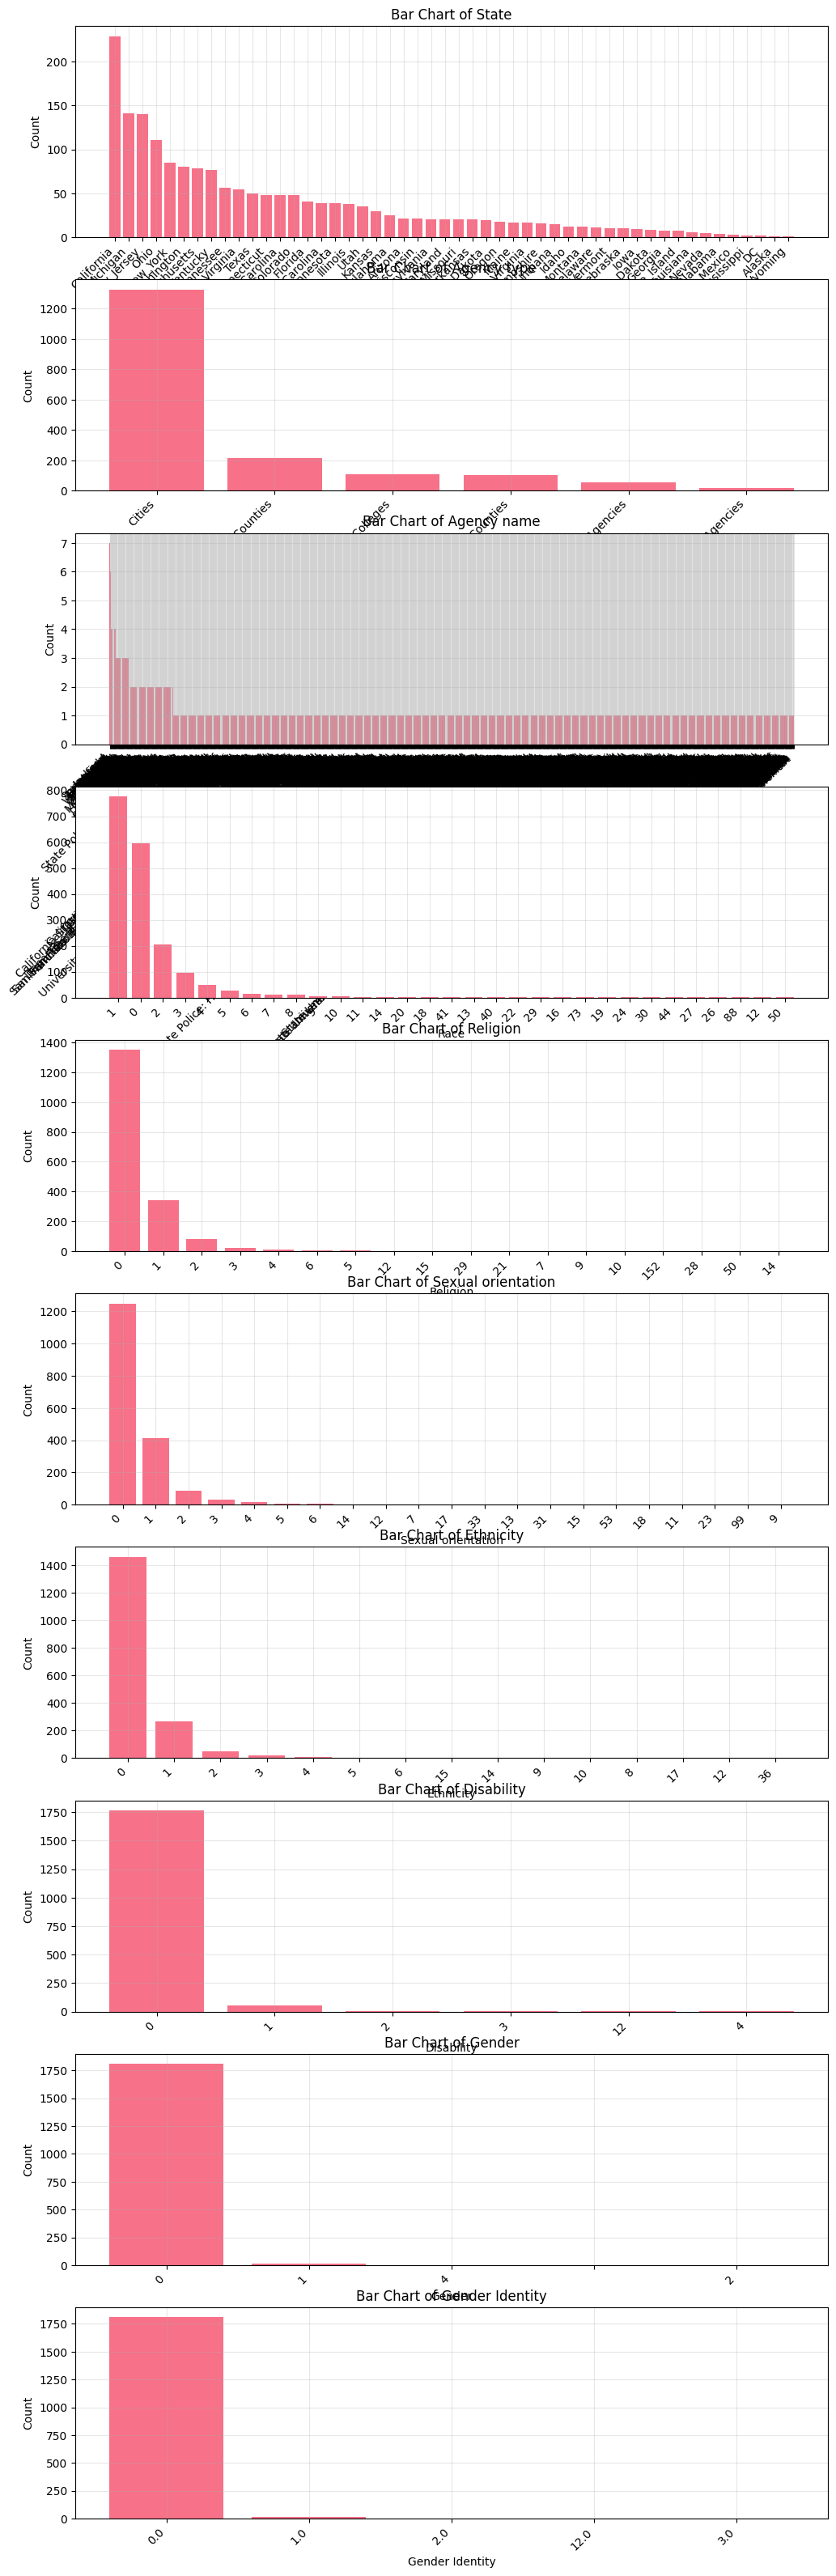

In [19]:
# list of categorical columns we care about (some might not exist in the data)
categorical_columns = ['State', 'Agency type', 'Agency name', 'Race', 'Religion', 
                      'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# only keep the ones that actually exist in the dataframe
categorical_columns = [col for col in categorical_columns if col in df.columns]

# plot a bar chart for each categorical column
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 4 * len(categorical_columns)))
if len(categorical_columns) == 1:
    axes = [axes]  # make sure axes is iterable even if there’s only one plot

# loop through each categorical feature and make a basic bar chart
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()
    axes[i].bar(range(len(value_counts)), value_counts.values)
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[i].grid(True, alpha=0.3)

# tidy up the layout so plots don’t overlap
plt.tight_layout()
plt.show()


In [20]:
# show some basic stats for all numeric columns
print("STATISTICAL SUMMARY FOR NUMERIC VARIABLES")
print("=" * 50)

for col in numeric_columns:
    print(f"\n{col.upper()}:")
    print(f"  Count: {df[col].count()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    
    # quick IQR check to see how many outliers are in this column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # grab the actual outlier values (anything outside the IQR range)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"  Outliers: {len(outliers)} values")
    if len(outliers) > 0:
        print(f"    Outlier values: {sorted(outliers.tolist())}")


STATISTICAL SUMMARY FOR NUMERIC VARIABLES

RACE:
  Count: 1826
  Mean: 1.57
  Median: 1.00
  Min: 0.00
  Max: 88.00
  Std Dev: 4.08
  Outliers: 247 values
    Outlier values: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 13, 14, 14, 16, 18, 18, 19, 20, 20, 22, 24, 26, 27, 29, 30, 40, 41, 44, 50, 73, 88]

RELIGION:
  Count: 1826
  Mean: 0.57
  Median: 0.00


C:\Users\kimiw\AppData\Local\Temp\ipykernel_6348\4000331456.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels)


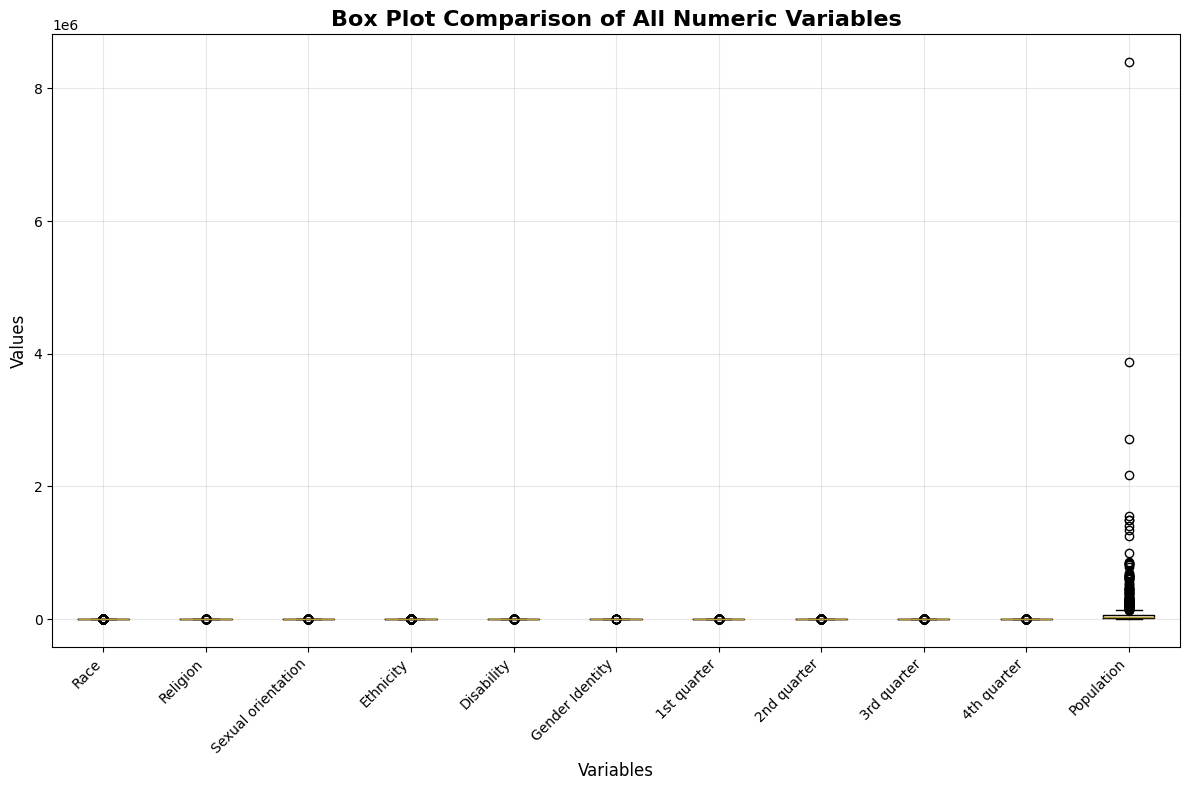

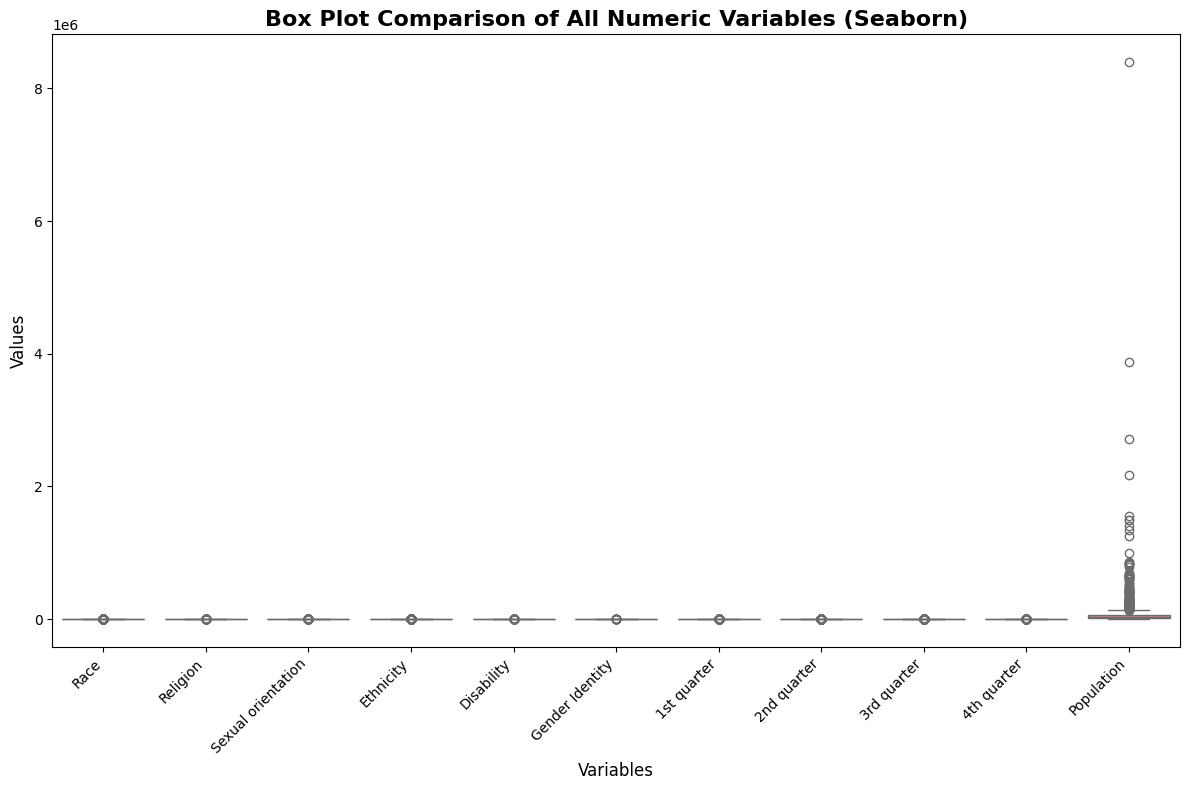

In [21]:
# plot boxplots for all numeric columns to compare distributions
plt.figure(figsize=(12, 8))

# collect numeric data and labels for the boxplot
box_data = []
box_labels = []

for col in numeric_columns:
    box_data.append(df[col].dropna())
    box_labels.append(col)

# basic matplotlib boxplot
plt.boxplot(box_data, labels=box_labels)
plt.title('Box Plot Comparison of All Numeric Variables', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# same thing but with seaborn (looks a lot cleaner)
plt.figure(figsize=(12, 8))

# reshape dataframe so seaborn can handle it easily
df_melted = df[numeric_columns].melt()

# draw the seaborn boxplot
sns.boxplot(data=df_melted, x='variable', y='value')
plt.title('Box Plot Comparison of All Numeric Variables (Seaborn)', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



ADDITIONAL INSIGHTS
Dataset shape: (1826, 15)
Total number of records: 1826
Number of missing values per column:
State                   0
Agency type             0
Agency name             0
Race                    0
Religion                0
Sexual orientation      0
Ethnicity               0
Disability              0
Gender                  2
Gender Identity         2
1st quarter            29
2nd quarter            36
3rd quarter            28
4th quarter            44
Population            392
dtype: int64

SUMMARY STATISTICS TABLE:
          Race  Religion  Sexual orientation  Ethnicity  Disability  \
count  1826.00   1826.00             1826.00    1826.00     1826.00   
mean      1.57      0.57                0.68       0.36        0.05   
std       4.08      4.02                3.20       1.38        0.37   
min       0.00      0.00                0.00       0.00        0.00   
25%       0.00      0.00                0.00       0.00        0.00   
50%       1.00      0.00      

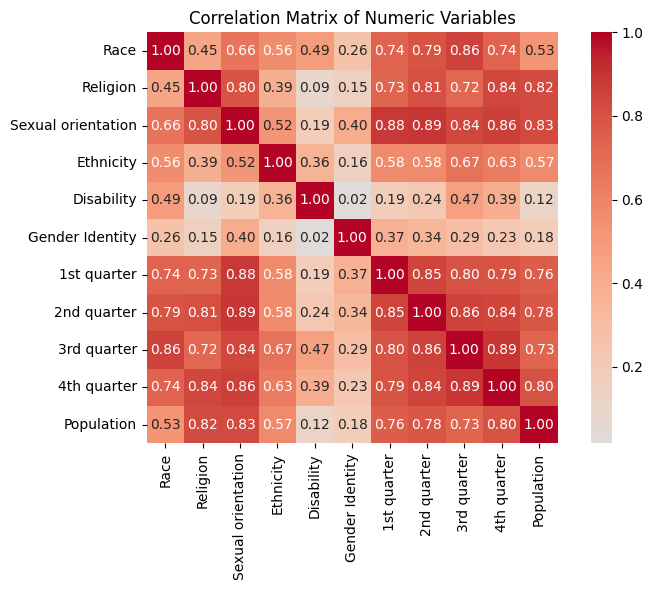


CATEGORICAL VARIABLE ANALYSIS:

State:
  Unique values: 50
  Most frequent: California (229 times)
  Value distribution:
State
California    229
Michigan      141
New_Jersey    140
Ohio          111
New_York       85
Name: count, dtype: int64

Agency type:
  Unique values: 6
  Most frequent: Cities (1326 times)
  Value distribution:
Agency type
Cities                       1326
Metropolitan Counties         216
Universities and Colleges     109
Nonmetropolitan Counties      102
State Police Agencies          53
Name: count, dtype: int64

Agency name:
  Unique values: 1609
  Most frequent: Lancaster (7 times)
  Value distribution:
Agency name
Lancaster      7
Jackson        6
Springfield    6
Ashland        5
Lexington      4
Name: count, dtype: int64

Race:
  Unique values: 31
  Most frequent: 1 (776 times)
  Value distribution:
Race
1    776
0    597
2    206
3     95
4     50
Name: count, dtype: int64

Religion:
  Unique values: 18
  Most frequent: 0 (1350 times)
  Value distributio

In [22]:
# take a deeper look at the data and pull out some quick insights
print("\nADDITIONAL INSIGHTS")
print("=" * 50)

# basic dataset info
print(f"Dataset shape: {df.shape}")
print(f"Total number of records: {len(df)}")
print(f"Number of missing values per column:")
print(df.isnull().sum())

# show quick summary stats for numeric columns
print("\nSUMMARY STATISTICS TABLE:")
print(df[numeric_columns].describe().round(2))

# check correlations between numeric columns (if there’s more than one)
if len(numeric_columns) > 1:
    print("\nCORRELATION MATRIX:")
    correlation_matrix = df[numeric_columns].corr()
    print(correlation_matrix.round(3))
    
    # quick heatmap to visualize correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

# take a look at the categorical columns
print("\nCATEGORICAL VARIABLE ANALYSIS:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {df[col].mode().iloc[0]} ({df[col].value_counts().iloc[0]} times)")
    print(f"  Value distribution:")
    print(df[col].value_counts().head())
